# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №4 (опциональное)
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы вкратце пройдете цикл решения задачи анализа данных от первичного знакомства с данными до некоторого приемлемого качества решения задачи. Девиз задания - все интерпретируемо! Мы будем визуализировать результаты работы всех используемых методов из sklearn, чтобы понять, как они работают с нашими данными. Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

**Срок сдачи:** 17 июня 2017, 23:59

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com` указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:
** [ИАД-X] Фамилия Имя ДЗ-4 **

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [3]:
DATA_DIR = os.path.join('data')
print(DATA_DIR)
IMG_DIR = os.path.join(DATA_DIR, 'images')
print(IMG_DIR)

data
data/images


In [4]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)
len(table_data)

990

In [5]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [6]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0,0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0,0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0,0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0,0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0,0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [8]:
np.random.seed(0)
le = LabelEncoder()
y = le.fit_transform(table_data.species)
X = np.array(table_data)

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, y):
    train_idx, test_idx = X[train_index][:, 0], X[test_index][:, 0]
    X_train, X_test = X[train_index][:, 2:], X[test_index][:, 2:]
    y_train, y_test = y[train_index], y[test_index]

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [10]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


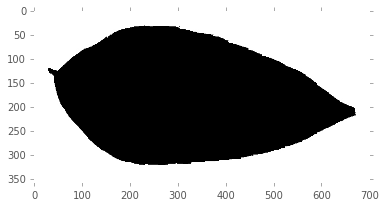

In [11]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции scipy.misc.imresiz:

In [12]:
from scipy.misc import imresize

In [13]:
img_resized = imresize(img, (100, 100))

/home/valeria/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


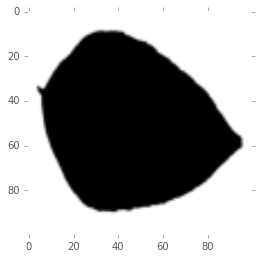

In [14]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только не картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [15]:
imgs_train = []
for i in train_idx:
    filepath = os.path.join(IMG_DIR, str(i) + '.jpg')
    img = plt.imread(filepath)
    img_resized = imresize(img, (100, 100))
    img_train = np.ravel(img_resized)
    imgs_train.append(img_train)
imgs_train = np.array(imgs_train)

/home/valeria/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [16]:
imgs_test = []
for i in test_idx:
    filepath = os.path.join(IMG_DIR, str(i) + '.jpg')
    img = plt.imread(filepath)
    img_resized = imresize(img, (100, 100))
    img_test = np.ravel(img_resized)
    imgs_test.append(img_test)
imgs_test = np.array(imgs_test)

/home/valeria/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

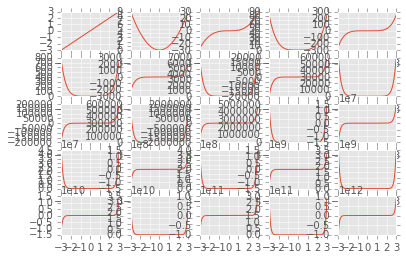

In [17]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    # plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

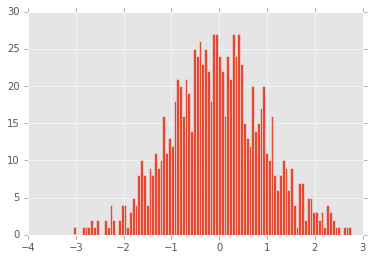

In [18]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (0.5 балла код + 0.5 балла выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

/home/valeria/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


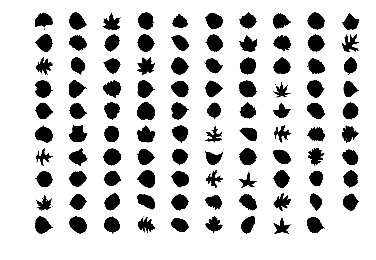

In [19]:
y_used = []
n = 1
for i in range(len(y_train)):
    if y_train[i] not in y_used:
        plt.subplot(10, 10, n)
        filepath = os.path.join(IMG_DIR, str(train_idx[i]) + '.jpg')
        img = plt.imread(filepath)
        img_resized = imresize(img, (100, 100))
        plt.imshow(img_resized, cmap='Greys')
        plt.grid(None)
        plt.axis("off")
        y_used.append(y_train[i])
        n += 1

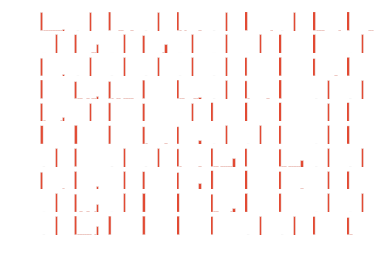

In [115]:
leaf = np.concatenate((imgs_train, imgs_test), axis=0)
import random
random.seed(0)
pixels = [random.randint(0, 1000) for i in range(100)]
i = 1
for pix in pixels:
    stat_pix = [img[pix] for img in leaf]
    plt.subplot(10, 10, i)
    _ = plt.hist(stat_pix, bins=10)
    plt.axis("off")
    i += 1
    
# фиг что разглядишь :(

(-0.5, 99.5, 99.5, -0.5)

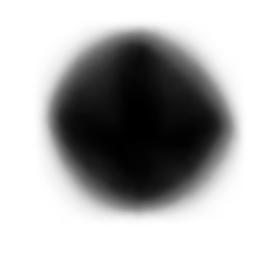

In [21]:
leaf_mid = np.mean(leaf, axis = 0)
leaf_mid.shape = (100, 100)
plt.imshow(leaf_mid, cmap='Greys')
plt.grid(None)


(-0.5, 99.5, 99.5, -0.5)

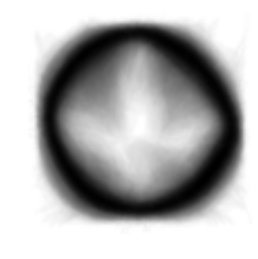

In [22]:
leaf_std = np.std(leaf, axis = 0)
leaf_std.shape = (100, 100)
plt.imshow(leaf_std, cmap='Greys')
plt.grid(None)
plt.axis("off")

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

1) Листья можно отличить визуально. Выделить группы похожих - легко, а выделить различия внутри каждой группы - сложно, различия слишком незаметные.
2) максимальное - 255, минимальное - 0. Самые частые значения - 255 и 0. Да, похожи.
3) Да, можно бинамизировать, так как изображения довольно контрастные, и серые пиксели пристутсвуют только в очертаниях листьев. В качестве порога я бы брала значение 255 (выбираем только черные пиксели)
4) Не очень похож, потому что из-за наложения листьев разной формы средний лист почти потерял свои очертания. Есть некоторое количество пикселей, которые, видимо, принимают почти все листья (в центральной области), но таких немного.

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Запустите t-SNE на обучающей выборке (если долго считается, берите меньше объектов) и визуализируйте с цветовым указанием классов. Выведите легенду цветов.
* Затем повторите предыдущий шаг с треми различными параметрами [расстояния Минковского](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html): p=2 (это евклидово расстояние, оно установлено по умолчанию), p=1 и p=np.infty. 

In [57]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X_train)

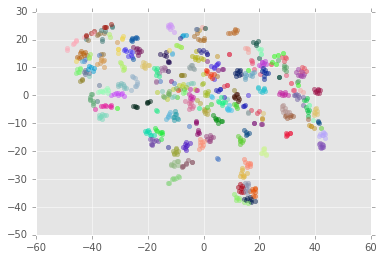

In [59]:
import random
classes = [x for x in range(0, 99)]
LABEL_COLOR_MAP = {c:(random.random(), random.random(), random.random()) for c in classes}

x_plot = [i[0] for i in X_tsne]
y_plot = [i[1] for i in X_tsne]
for i in range(len(x_plot)):
    c = LABEL_COLOR_MAP[y_train[i]]
    plt.scatter(x_plot[i], y_plot[i], color = c, alpha = 0.5)

In [187]:
from scipy.spatial.distance import minkowski
print(minkowski(x_plot, y_plot, 2))
print(minkowski(x_plot, y_plot, 1))
print(minkowski(x_plot, y_plot, np.infty))

906.9279174804688
21288.371
65.87785


Ответьте на вопросы:
* Хорошо ли разделяются классы на визуализации? 
* Можно ли выделить группы похожих классов по визуализации? Если да, то похожи ли они на те, которые вы выделяли в предыдущей секции вопросов?
* С каким параметром расстояния Минковского визуализация получается лучше всего? Предположите, почему (для этого надо разобраться, как работает расстояние с p=1 и p=бесконечность применительно к картинкам)

1) выделяются плохо
2) выделить группы нельзя

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

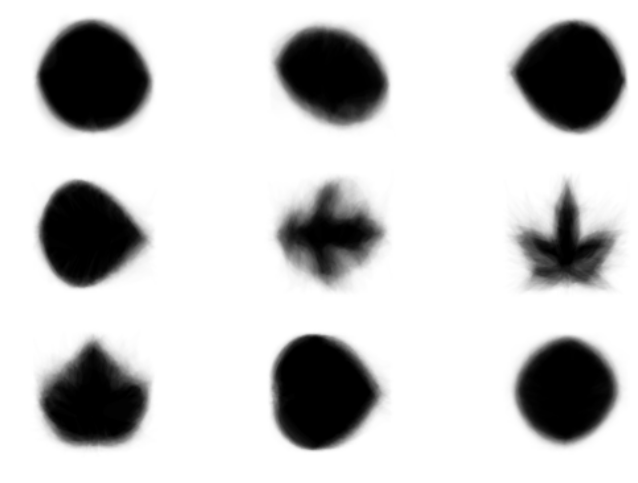

In [195]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, random_state=0)
kmeans.fit(leaf)
i = 1
np.shape(kmeans.cluster_centers_)
for el in kmeans.cluster_centers_:
    el.shape = (100, 100)
    plt.subplot(3, 3, i)
    plt.imshow(el, cmap='Greys')
    plt.grid(None)
    plt.axis("off")
    i += 1

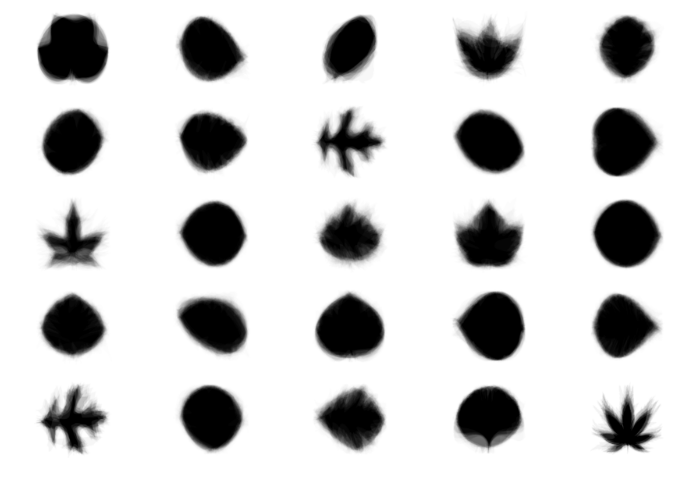

In [196]:
kmeans = KMeans(n_clusters=25, random_state=0)
kmeans.fit(leaf)
i = 1
np.shape(kmeans.cluster_centers_)
for el in kmeans.cluster_centers_:
    el.shape = (100, 100)
    plt.subplot(5, 5, i)
    plt.imshow(el, cmap='Greys')
    plt.grid(None)
    plt.axis("off")
    i += 1

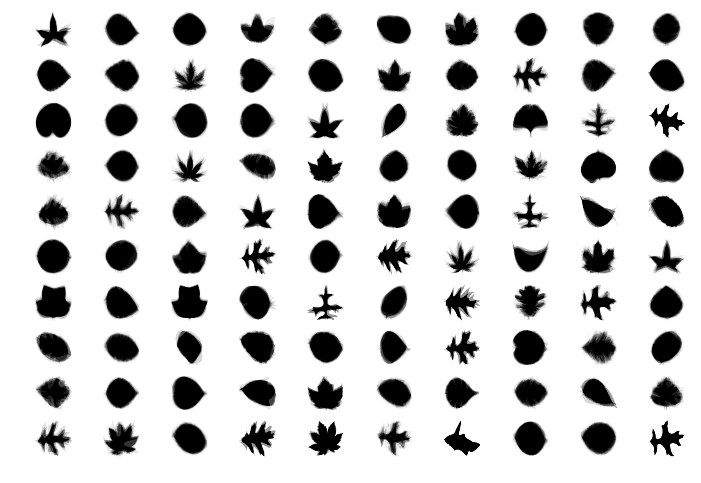

In [197]:
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(leaf)
i = 1
for el in kmeans.cluster_centers_:
    el.shape = (100, 100)
    plt.subplot(10, 10, i)
    plt.imshow(el, cmap='Greys')
    plt.grid(None)
    plt.axis("off")
    i += 1

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

1) Да, похожи
2) Центры - обобщенные варианты картинок класса, поэтому имеют более "смазанные" очертания - чтобы примерно походить на все листья класса
3) Да, есть
4) Кажется, это число должно быть больше 9 и меньше 25. Если выбирать 9 и меньше, то алгоритм смешивает некоторые классы в один, так как у низ достаточно много похожего (но все-таки они точно разные). Если выбирать больше 25, то кластеры становятся похожими на копии картинок и начинает выделять избыточные классы (между которыми лично я вижу очень мало различий. Хотя возможно, чтобы сохранить степерь разнообразия классов, данную в исходной таблице, надо все-так выбирать 99 кластеров. Но, повторюсь, там многие виды кажутся совсем одинаковыми.

__Бонус 1 (1 доп. балл)__

Повторите кластеризацию с другими метриками, рассмотренными в разделе Визуализация. Отличаются ли результаты? 

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (0.5 балла код + 0.5 балла выводы)
Настройте 3 классификатора и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется параметр feature\_log\_prob_ - это оцененный по данным логарифм вероятности $P(x_i|y)$. Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

Accuracy score: 0.5959595959595959


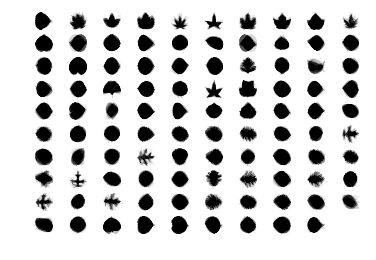

In [79]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

clf = NearestCentroid()
clf.fit(imgs_train, y_train)
y_pred = clf.predict(imgs_test)

score = []
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        score.append(1)
    else:
        score.append(0)
accuracy = sum(score) / len(score)
print('Accuracy score:', accuracy)

i = 1
for el in clf.centroids_:
    el.shape = (100, 100)
    plt.subplot(10, 10, i)
    plt.imshow(el, cmap='Greys')
    plt.grid(None)
    plt.axis("off")
    i += 1

Accuracy score: 0.5353535353535354


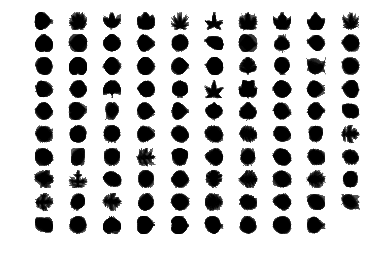

In [81]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(imgs_train, y_train)
y_pred = clf.predict(imgs_test)

score = []
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        score.append(1)
    else:
        score.append(0)
accuracy = sum(score) / len(score)
print('Accuracy score:', accuracy)

i = 1
for el in clf.feature_log_prob_:
    el.shape = (100, 100)
    plt.subplot(10, 10, i)
    plt.imshow(el, cmap='Greys')
    plt.grid(None)
    plt.axis("off")
    i += 1

Accuracy score: 0.5909090909090909


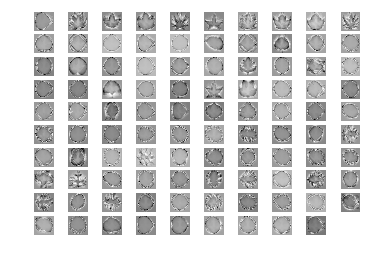

In [83]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(imgs_train, y_train)
y_pred = logreg.predict(imgs_test)

score = []
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        score.append(1)
    else:
        score.append(0)
accuracy = sum(score) / len(score)
print('Accuracy score:', accuracy)

i = 1
for el in logreg.coef_:
    el.shape = (100, 100)
    plt.subplot(10, 10, i)
    plt.imshow(el, cmap='Greys')
    plt.grid(None)
    plt.axis("off")
    i += 1

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

1) Лучше всего работает первый метод, так как в нашем случае точно можно отчетливо выделить классы и выделить их общие черты (чего не может логистическая регрессия, например)
2) Все визуализации очень похожи на листья (но веса все-таки меньше всего)
3) Я так думаю, потому что первые два классификатора работали путем "усереднения" изображения листа данного класса, а веса линейной регрессии увеличиваются при наибольшей значимости признака-пикселя. Для определения вида листа наиболее значим его контур.

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на наших данных. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

Accuracy score: 0.5959595959595959


(-0.5, 99.5, 99.5, -0.5)

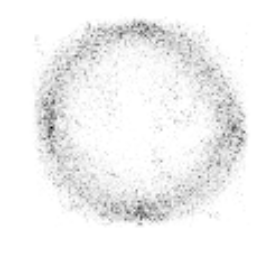

In [95]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(imgs_train, y_train)
pred_prob = forest.predict_proba(imgs_test)

y_pred = np.array([i.argmax() for i in pred_prob])

score = []
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        score.append(1)
    else:
        score.append(0)
accuracy = sum(score) / len(score)
print('Accuracy score:', accuracy)

ffi = forest.feature_importances_
ffi.shape = (100, 100)
plt.imshow(ffi, cmap='Greys')
plt.grid(None)
plt.axis("off")

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

1) Немного похоже. 2) В принципе, соответствует здравому смыслу - более темные области располагаются вокруг "листа", и именно они определяют его контур => вид. Большая часть "неважных" областей действительно не очень важны, так как пиксели в этих местах есть почти в каждой картинке (судя по визуализации std).

### Другой наивный байесовский классификатор (0.25 балла код + 0.25 балла выводы)
* В разделе Простая визуализаия вы придумали порог, по которому можно бинаризовать картинки. Выполните эту бинаризацию и настройте BernoulliNB, выведите качество на контроле.
* Визуализируйте вероятности.

In [113]:
from sklearn.naive_bayes import BernoulliNB

binar_train = []
for img in imgs_train:
    bt = []
    for el in img:
        if el > 250:
            bt.append(1)
        else:
            bt.append(0)
    binar_train.append(bt)
    
binar_test = []
for img in imgs_test:
    btt = []
    for el in img:
        if el > 250:
            btt.append(1)
        else:
            btt.append(0)
    binar_test.append(btt)

binar_train = np.array(binar_train)
binar_test = np.array(binar_test)

Accuracy score: 0.5858585858585859


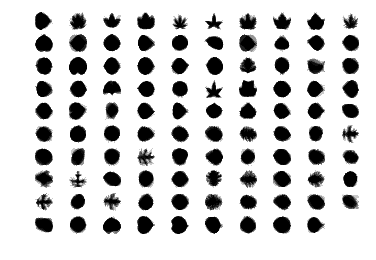

In [114]:
clf = BernoulliNB()
clf.fit(binar_train, y_train)
y_pred = clf.predict(binar_test)

score = []
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        score.append(1)
    else:
        score.append(0)
accuracy = sum(score) / len(score)
print('Accuracy score:', accuracy)

i = 1
for el in clf.feature_log_prob_:
    el.shape = (100, 100)
    plt.subplot(10, 10, i)
    plt.imshow(el, cmap='Greys')
    plt.grid(None)
    plt.axis("off")
    i += 1

Ответьте на вопросы:
* Улучшилось на качество классификации по сравнению с MultinomialNB? Как вы думаете, почему?
* Похожи ли картинки на листья?

1) Улучшилось, поскольку есть существенная разница в алгоритмах: мультиноминал простно игнорирует нечастотные признаки, а Бернулли их штрафует (благодаря этому картинки более четкие, меньше расплывающихся силуэтов).
2) Да, похожи

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обуении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд. После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [116]:
num_components = 2**np.arange(10)
num_components

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

### Отбор признаков (0.5 балла код + 0.5 балла выводы)
* Обучите SelectKBest на обучающих данных. Он ранжирует признаки согласно статистическому тесту, оценивающему согласованность каждого признака с целевой переменной.
* Визуализруйте scores\_ как картинку 100x100.
* Оставьте 100 самых важных признаков и обучите на них логистическую регрессию. Выведите качество на контрольной выборке.

In [129]:
from sklearn.feature_selection import SelectKBest

/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [   0    1    2 ... 9997 9998 9999] are constant.
  UserWarning)


(-0.5, 99.5, 99.5, -0.5)

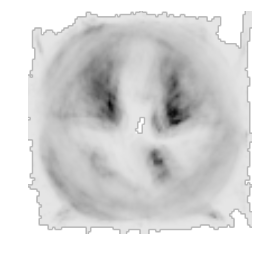

In [163]:
clf = SelectKBest()
clf.fit(imgs_train, y_train)
arr = clf.scores_.reshape(100, 100)
plt.imshow(arr, cmap='Greys')
plt.grid(None)
plt.axis("off")

In [173]:
ind_best_feat = np.argpartition(clf.scores_, -100)[-100:]
best_feat_train = []
best_feat_test = []
for img in imgs_train:
    best_feat_train.append([img[x] for x in ind_best_feat])
for img in imgs_test:
    best_feat_test.append([img[x] for x in ind_best_feat])
best_feat_train = np.array(best_feat_train)
best_feat_test = np.array(best_feat_test)

In [174]:
logreg = LogisticRegression()
logreg.fit(best_feat_train, y_train)
y_pred = logreg.predict(best_feat_test)

score = []
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        score.append(1)
    else:
        score.append(0)
accuracy = sum(score) / len(score)
print('Accuracy score:', accuracy)

Accuracy score: 0.010101010101010102


Ответьте на вопрос:
* Разумно ли предложенное алгоритмом ранжирование? Верно ли, что признаки, которые он указал как неважные, действительно не помогают классифицировать листья?
* Сильно ли изменилось качество решения задачи после отбора признаков?

1) Нет, неразумно, признаков оказалось слишком мало. 2) Поэтому качество сильно ухудшилось.

## 5. Hyperparameters tuning
Наконец, пришло время настроить гиперпараметры модели и получить итоговое качество. В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

### Настройка гиперпараметров случайного леса (2 балла)
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier()

n_estimators = [x for x in range(100, 1000, 1000)] + [1000]
max_depth = [x for x in range(1, 100, 10)] + [100]
max_features = [x for x in range(100, 10000, 1000)] + [10000]
parameters = [{'n_estomators': n_estimators}, {'max_depth': max_depth}, {'max_features': max_features}]
clf = GridSearchCV(forest, parameters)
clf.fit(imgs_train, y_train)

ValueError: Invalid parameter n_estomators for estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=100, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

Часто при решении задачи еще используется шестой шаг - композиции методов. Но в данном задании мы это пропустим :)

__Доп. задание (1-2 балла)__
Попробуйте придумать какие-нибудь признаки из сырых данных (картинок) или табличных и настроить на них случайный лес. Ваша цель - улучшить качество классификации по сравнению с исходными признаками.